In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_excel('Algerian_forest_fires_dataset_UPDATE.xlsx', header=1)

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [40]:
print(df.dtypes)

Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes         int64
dtype: object


In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [28]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [30]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Classes       1
Name: count, dtype: int64

In [31]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [32]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
246,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [33]:
df['Classes'].value_counts()

Classes
1    138
0    109
Name: count, dtype: int64

In [34]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [35]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0


In [36]:
y

0      0.5
1      0.4
2      0.1
3        0
4      0.5
      ... 
242    6.5
243      0
244    0.2
245    0.7
246    0.5
Name: FWI, Length: 247, dtype: object

In [42]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
X_train.shape,X_test.shape

((185, 10), (62, 10))

In [ ]:
## Feature Selection based on correlaltion
# Remove any rows that contain the word 'Temperature' or other text headers
df = df[df['Temperature'] != 'Temperature']

#  Remove any rows that are completely empty
df = df.dropna(how='all')

#  Convert all numeric columns properly
cols_to_convert = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

#  Verify types again
print(df.dtypes)

#  Now compute correlation
correlation_matrix = df[cols_to_convert].corr()
correlation_matrix

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
dtype: object


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.566670
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.580957
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032368
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324422
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691132
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941988,0.635891,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


In [44]:
X_train.shape,X_test.shape

((185, 10), (62, 10))

In [ ]:
# Check datatypes again
print(X_train.dtypes)

#Convert any leftover string columns to numeric safely
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# If there are any NaN values created during conversion (from bad strings), drop them
X_train = X_train.dropna()

# Now correlation will work
corr_matrix = X_train.corr()
corr_matrix


Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
Classes         int64
dtype: object


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.686084,-0.330802,-0.359130,0.706638,0.493525,0.383575,0.594178,0.468391,0.527273
RH,-0.686084,1.000000,0.177508,0.243472,-0.659163,-0.415524,-0.228119,-0.728513,-0.359639,-0.454397
Ws,-0.330802,0.177508,1.000000,0.231727,-0.146112,0.015884,0.085351,0.020357,0.041828,-0.024232
Rain,-0.359130,0.243472,0.231727,1.000000,-0.557260,-0.286658,-0.296322,-0.338002,-0.296706,-0.369113
FFMC,0.706638,-0.659163,-0.146112,-0.557260,1.000000,0.616676,0.514774,0.740784,0.600993,0.782712
DMC,0.493525,-0.415524,0.015884,-0.286658,0.616676,1.000000,0.872434,0.683722,0.983779,0.601000
DC,0.383575,-0.228119,0.085351,-0.296322,0.514774,0.872434,1.000000,0.487211,0.943866,0.515193
ISI,0.594178,-0.728513,0.020357,-0.338002,0.740784,0.683722,0.487211,1.000000,0.633133,0.723535
BUI,0.468391,-0.359639,0.041828,-0.296706,0.600993,0.983779,0.943866,0.633133,1.000000,0.590804
Classes,0.527273,-0.454397,-0.024232,-0.369113,0.782712,0.601000,0.515193,0.723535,0.590804,1.000000


<Axes: >

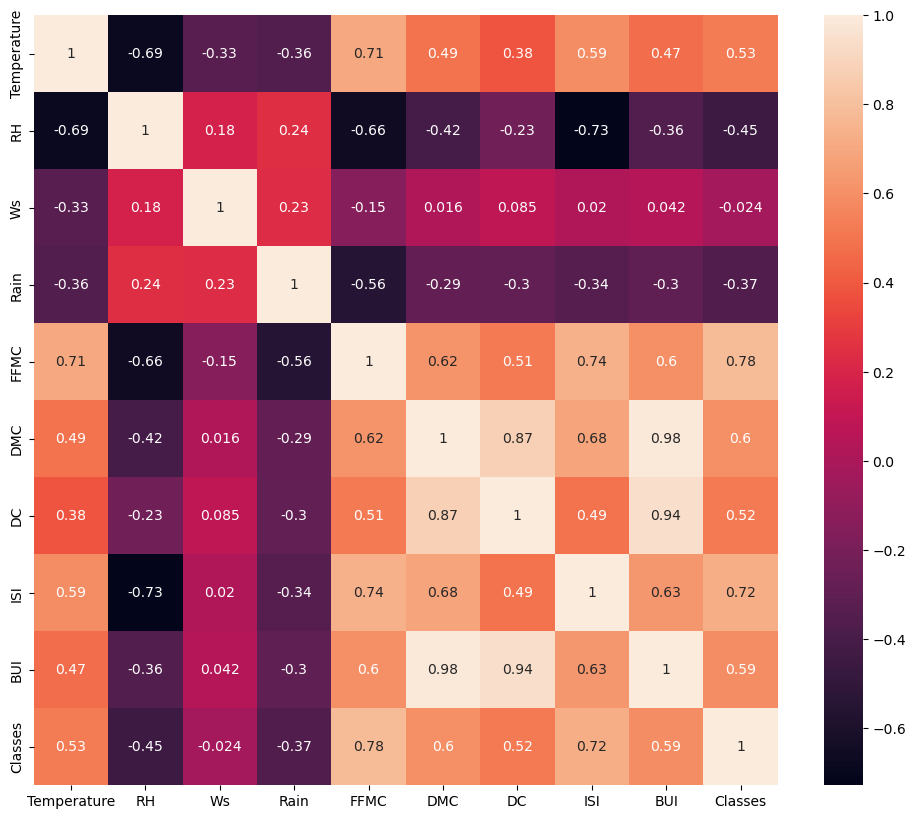

In [47]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [48]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.686084,-0.330802,-0.359130,0.706638,0.493525,0.383575,0.594178,0.468391,0.527273
RH,-0.686084,1.000000,0.177508,0.243472,-0.659163,-0.415524,-0.228119,-0.728513,-0.359639,-0.454397
Ws,-0.330802,0.177508,1.000000,0.231727,-0.146112,0.015884,0.085351,0.020357,0.041828,-0.024232
Rain,-0.359130,0.243472,0.231727,1.000000,-0.557260,-0.286658,-0.296322,-0.338002,-0.296706,-0.369113
FFMC,0.706638,-0.659163,-0.146112,-0.557260,1.000000,0.616676,0.514774,0.740784,0.600993,0.782712
DMC,0.493525,-0.415524,0.015884,-0.286658,0.616676,1.000000,0.872434,0.683722,0.983779,0.601000
DC,0.383575,-0.228119,0.085351,-0.296322,0.514774,0.872434,1.000000,0.487211,0.943866,0.515193
ISI,0.594178,-0.728513,0.020357,-0.338002,0.740784,0.683722,0.487211,1.000000,0.633133,0.723535
BUI,0.468391,-0.359639,0.041828,-0.296706,0.600993,0.983779,0.943866,0.633133,1.000000,0.590804
Classes,0.527273,-0.454397,-0.024232,-0.369113,0.782712,0.601000,0.515193,0.723535,0.590804,1.000000


In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [51]:
corr_features

{'BUI', 'DC'}

In [52]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 8), (62, 8))

## Feature Scaling Or Standardization


In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
X_train_scaled

array([[ 0.18812482,  0.71437574, -1.34314341, ..., -0.99702825,
        -0.95574862, -1.14913568],
       [ 1.79681424, -2.81327614,  0.58018695, ...,  0.27737726,
         2.44478186,  0.87021926],
       [-0.61621989,  0.71437574, -0.95847734, ..., -0.95769475,
        -0.97872518, -1.14913568],
       ...,
       [-1.9567944 ,  0.91789412,  0.58018695, ..., -1.06782856,
        -1.07063141, -1.14913568],
       [ 1.79681424,  0.10382061, -2.49714162, ..., -0.24969169,
        -0.86384239, -1.14913568],
       [-0.61621989,  0.98573358,  2.11885123, ..., -1.02062835,
        -0.86384239, -1.14913568]], shape=(181, 8))

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

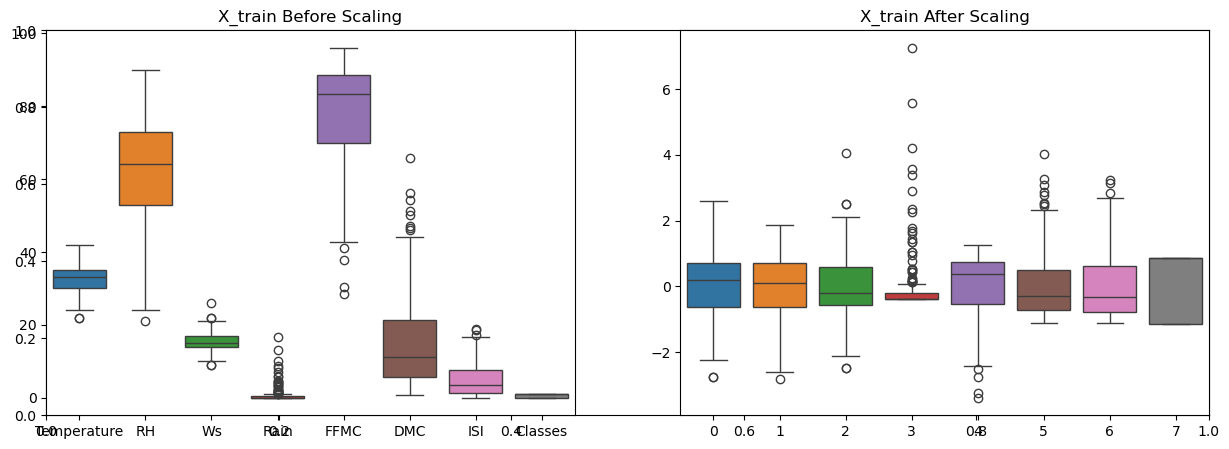

In [55]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model 

In [61]:
import pandas as pd

# Load dataset
df = pd.read_excel('Algerian_forest_fires_dataset_UPDATE.xlsx', header=1)

# Remove duplicate headers or bad rows (e.g., those containing strings like 'Temperature')
df = df[df['Temperature'] != 'Temperature']

# Drop fully empty rows
df = df.dropna(how='all')

# Convert all numeric columns properly
numeric_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows where Classes column accidentally contains numeric data
df = df[df['Classes'].isin(['fire', 'not fire'])]

# Convert target to binary (classification ready)
df['Classes'] = df['Classes'].str.strip().replace({'fire': 1, 'not fire': 0}).astype(int)


C:\Users\abhishek.anand\AppData\Local\Temp\ipykernel_24484\1724247988.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Classes'] = df['Classes'].str.strip().replace({'fire': 1, 'not fire': 0}).astype(int)


In [62]:
X = df[numeric_cols]   # use only numeric features
y = df['Classes']


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.2395190563785687
R2 Score 0.6646824298727511


## Lasso Regression model

In [66]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.48946135831381726
R2 Score -0.01366541339068772


## Ridge Regression model

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.24371461421535906
R2 Score 0.6597015600734986


## Elasticnet Regression

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.48946135831381726
R2 Score -0.01366541339068772


In [69]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
